# Predicting Email Spam Using Keyword Checking

**DSCI 100 group 162** : Sarah Hoang, Euna Ao, Siddhanth Duggal

## Introduction

### Background Information:

Spam emails are unsolicited messages sent in bulk with malicious intent. Diverse in nature, spam emails can come in form of advertisements for products/websites, make-money-fast schemes, chain letters, pornography. In addition to wasting the receiver’s time and resources, spam emails make users susceptible to scams and security breaches, thereby, putting them at risk of stolen information and losing money (Ahmed, 2022). 

### Research Question:

Can we predict whether an email is spam or not-spam based on the frequency of exclamation marks, frequency of dollar signs, and frequency of brackets within the email?

### Information on Dataset:

This dataset consists of information derived from 4601 emails that are classified as either spam or not-spam. Collected by Hopkins et al. from the Hewlett-Packard lab in 1999, this dataset is split into two classifications of email: 

1) Spam emails, which was created by accumulating spam emails failed by individuals and post masters and 

2) Non-spam emails, which was created by personal and work emails donated by George Forman. 

This dataset contains information about 57 continuous real variables, and contains one class-label column to denote whether the email is spam or not (Dua D. and Graff C., 2019), (Hopkins, 1999). As the non-spam emails were donated by George Forman, words such as "george" and "650" indicate non-spam emails. No relevant papers are derived from this dataset. 


## Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### 1. Load Data into R

In [2]:
data <- read_csv("https://raw.githubusercontent.com/SarahHoang/dsci-100-project-group-162/main/spambase.data", 
                      col_names = FALSE)

Rows: 4601 Columns: 58
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (58): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
data

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.30,0,0.30,0,0.00,0,0,0,0,0,⋯,0.102,0.718,0,0.000,0,0,1.404,6,118,0
0.96,0,0.00,0,0.32,0,0,0,0,0,⋯,0.000,0.057,0,0.000,0,0,1.147,5,78,0
0.00,0,0.65,0,0.00,0,0,0,0,0,⋯,0.000,0.000,0,0.125,0,0,1.250,5,40,0


                                                        Figure 1.0 - Spambase Data

### 2. Cleaning and Wrangling data into Tidy Format

After reading our dataset from the web, we will clean and wrangle the data into tidy format. This includes renaming the columns and mutating the classification label to a factor. We also added serial numbers to every observation and removed rows containing missing values. We are keeping all predictor variables as we will need them all to later determine which predictor variables are appropriate for our model. Refer to Figure 2.0 for the tidy dataset.

In [4]:
#generating column names for our dataset
clean_data <- tibble::rowid_to_column(data)

#generating column names for our dataset
column_names <- read_delim("https://raw.githubusercontent.com/SarahHoang/dsci-100-project-group-162/main/spambase.names", 
                         skip = 33,
                        col_names = FALSE) |> 
                        select(X1) |>
                        rename("col_name" = X1)

col <- toString(column_names)

colnames(clean_data) <- c("ID", "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", 
  "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
  "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", 
  "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", 
  "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
  "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", 
  "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", 
  "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", 
  "char_freq_semicolon", "char_freq_bracket", "char_freq_squarebracket", "char_freq_exclamation", 
                          "char_freq_dollar", "char_freq_hashtag", "capital_run_length_average", 
  "capital_run_length_longest", "capital_run_length_total", "spam_indicator")


#Changing class label from dbl to factor

clean_data <- clean_data |>
   mutate(spam_indicator = as_factor(spam_indicator))

            

Rows: 57 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (2): X1, X2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
clean_data

ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,⋯,char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_indicator
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4599,0.30,0,0.30,0,0.00,0,0,0,0,⋯,0.102,0.718,0,0.000,0,0,1.404,6,118,0
4600,0.96,0,0.00,0,0.32,0,0,0,0,⋯,0.000,0.057,0,0.000,0,0,1.147,5,78,0
4601,0.00,0,0.65,0,0.00,0,0,0,0,⋯,0.000,0.000,0,0.125,0,0,1.250,5,40,0


                                        Figure 2.0 - Tidy Spambase Data

### 3. Split Data into Training and Testing Datasets (Display table: Training Data)

We split the dataset into a training and testing dataset. We also set the seed to ensure reproducability. We used a prop value of 0.75, meaning that 75% of our data was allocated as training data, while the remaining 25% of the data will be our testing data. The testing data is set aside. 

In [6]:
set.seed(6666)

data_split <- initial_split(clean_data, prop = 0.75, strata = spam_indicator)
data_train <- training(data_split)
data_test <- testing(data_split)

In [7]:
data_train

ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,⋯,char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_indicator
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1814,0,0,0,0,0,0,0,0,0,⋯,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,0
1815,0,0,0,0,0,0,0,0,0,⋯,0.299,0.000,0.000,0.149,0.000,0.000,1.040,2,26,0
1816,0,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1811,0,0.00,0.77,0,0.38,0.38,0.38,0.00,0.00,⋯,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,1
1812,0,0.00,0.00,0,0.53,0.00,0.53,0.00,0.53,⋯,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,1
1813,0,0.31,0.42,0,0.00,0.10,0.00,0.52,0.21,⋯,0.000,0.016,0.000,0.887,0.032,0.049,3.446,318,1003,1


                                        Figure 3.0 - Spambase Training Data

### 4. Exploratory Data Analysis using Training Dataset

#### 4.1 Tables

In [8]:
data_counts <- data_train %>%
group_by(spam_indicator) %>%
    summarize(count = n())
   

In [9]:
data_counts

spam_indicator,count
<fct>,<int>
0,2091
1,1359


     Figure 4.1.0 - Spam Distribution

From this table (Figure 4.1.0), we can see that the training data has a good distribution of spam and non-spam emails. This indicates the original dataset was stratified, and that there are enough observations of both spam and non-spam to train our model.


In [10]:
data_train_mean <- data_train %>%
    summarize(char_freq_exclamation_mean = mean(char_freq_exclamation),
          char_freq_dollar_mean = mean(char_freq_dollar),
          char_freq_hashtag_mean = mean(char_freq_hashtag),
            char_freq_bracket_mean = mean(char_freq_bracket))

In [11]:
data_train_mean

char_freq_exclamation_mean,char_freq_dollar_mean,char_freq_hashtag_mean,char_freq_bracket_mean
<dbl>,<dbl>,<dbl>,<dbl>
0.2749861,0.07395942,0.04120406,0.1396745


                             Figure 4.1.1 - Predictor Means

From this table (Figure 4.1.1), we can see that the means are not well-centered and well-scaled, as the means are not within a similar range. This indicates that we must scale and center our data for future processing. 

In [12]:
data_train_max <- data_train %>% 
    summarize(char_freq_exclamation_max = max(char_freq_exclamation),
          char_freq_dollar_max = max(char_freq_dollar),
          char_freq_hashtag_max = max(char_freq_hashtag),
              char_freq_bracket_max = max(char_freq_bracket))


data_train_min <- data_train %>%
    summarize(char_freq_exclamation_min = min(char_freq_exclamation),
          char_freq_dollar_min = min(char_freq_dollar),
          char_freq_hashtag_min = min(char_freq_hashtag),
              char_freq_bracket_min = min(char_freq_bracket))

In [13]:
data_train_max

char_freq_exclamation_max,char_freq_dollar_max,char_freq_hashtag_max,char_freq_bracket_max
<dbl>,<dbl>,<dbl>,<dbl>
32.478,5.3,19.829,9.752


                            Figure 4.1.2 - Predictor Maximums

In [14]:
data_train_min

char_freq_exclamation_min,char_freq_dollar_min,char_freq_hashtag_min,char_freq_bracket_min
<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0


                             Figure 4.1.3 - Predictor Minimums

From these two tables (Figure 4.1.2 and Figure 4.1.3), we can see that the observations are not well scaled, as the maximum values fall within a large scale. This indicates that we should scale our data for future processing, as there are differing ranges between the variables.

#### 4.2 Data visualization (scatter plot)

In [15]:
train_plot <- ggpairs(data_train, columns = 50:55, 
                      title = "Figure 4.2 Exploratory data analysis using selected predictors",
                      ggplot2::aes(colour=spam_indicator)) +
                        theme(text = element_text(size=20))
options(repr.plot.width = 10, repr.plot.height = 9)

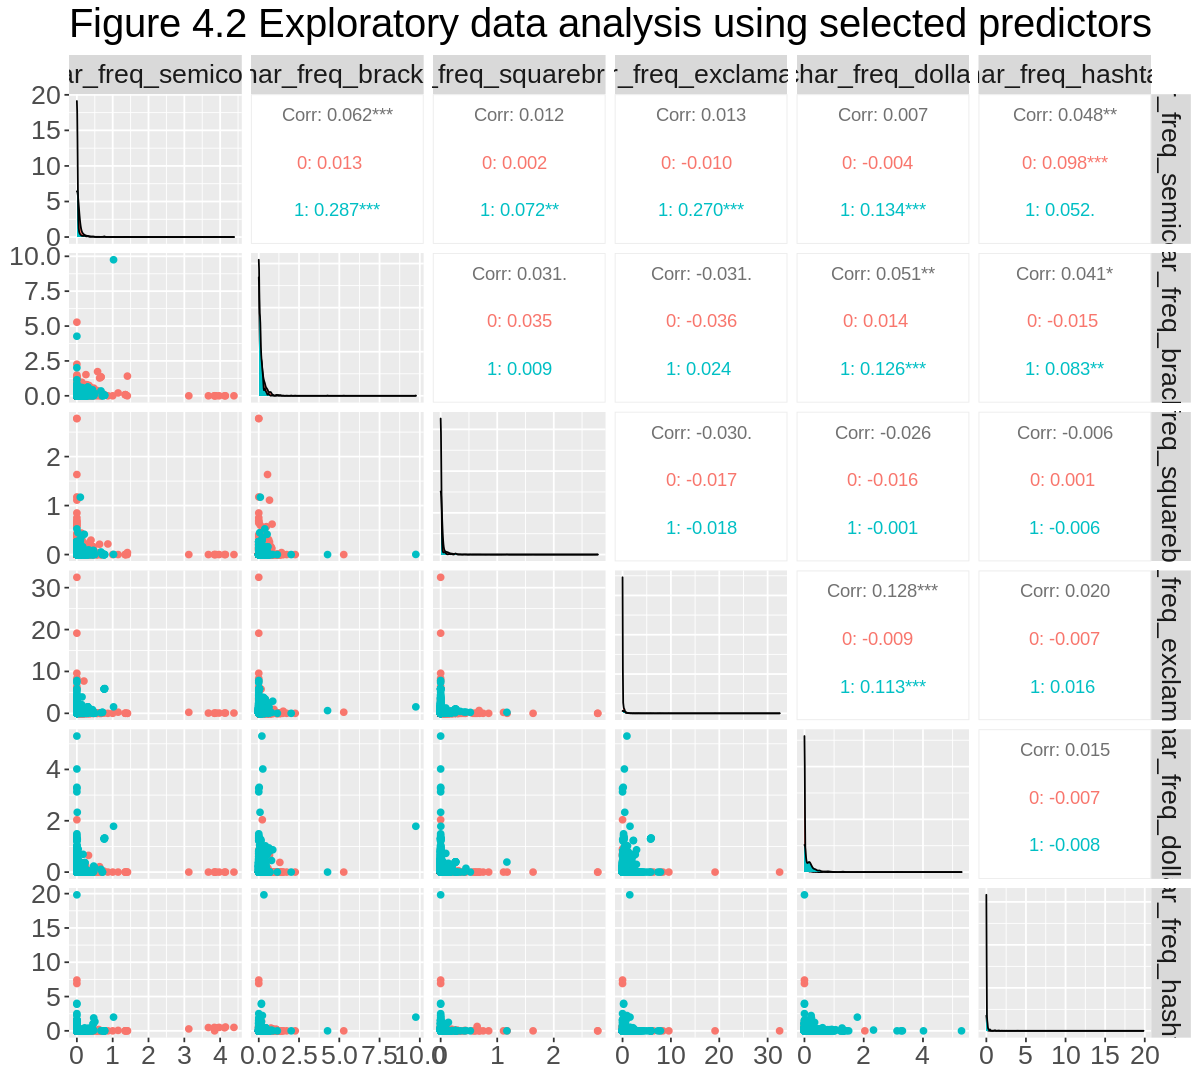

In [16]:
train_plot

                     Figure 4.2 - Pairwise Plot Matrix

## Methods

We are using **forward selection** to determine the most accurate attributes to detect spam emails. 

After forward selection, our predictor variables are `char_freq_exclamation`, `char_freq_bracket`, `char_freq_dollar`.`spam_indicator` is the class label. It denotes whether the email is spam (1) or not-spam (0). 

### 5. Choosing our Predictors with Forward Selection

#### 5.1 Preparations
A tibble is created to store our results to proceed with forward selection. We created our model specificiation for this project. We will be using this same model for the rest of the project.The 5-fold cross-validation object is created.

In [17]:
set.seed(6666)

# extract names for our predict values
data_subset <- data_train |>
  select("char_freq_semicolon", "char_freq_bracket", "char_freq_squarebracket", "char_freq_exclamation", 
        "char_freq_dollar", "char_freq_hashtag", "spam_indicator")
data_subset

names <- colnames(data_subset |> select(-spam_indicator))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
data_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
data_vfold <- vfold_cv(data_subset, v = 5, strata = spam_indicator)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,spam_indicator
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.022,0.022,0.019,0.022,0.022,0.022,0
0.299,0.000,0.000,0.149,0.000,0.000,0
0.000,0.000,0.000,0.000,0.000,0.000,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.063,0.127,0.255,0.510,0.000,0.000,1
0.000,0.000,0.000,0.082,0.000,0.000,1
0.000,0.016,0.000,0.887,0.032,0.049,1


                                Figure 5.1 - Forward Selection Variables

#### 5.2 Forward Selection Results

Referring to Figure 5.2, we can conclude which predictor variables we will use. From the forward selection results, we have selected`char_freq_exclamation`,  `char_freq_dollar`, `char_freq_bracket` as the most accurate predictors as they have a combined accuracy of ~85%. While other combinations may have higher accuracies (ie. `char_freq_exclamation`+ `char_freq_dollar` + `char_freq_bracket` + `char_freq_hashtag` + `char_freq_semicolon`), there is only a minor increase in accuracy despite the complexity needed to introduce another predictor variable. Therefore, we select `char_freq_exclamation`,  `char_freq_dollar`, and `char_freq_bracket` as our predictor variables moving forward.

In [18]:
set.seed(6666)
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("spam_indicator", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        data_recipe <- recipe(as.formula(model_string), 
                                data = data_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(data_recipe) |>
          add_model(data_spec) |>
          tune_grid(resamples = data_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,spam_indicator ~ char_freq_exclamation,0.7860842
2,spam_indicator ~ char_freq_exclamation+char_freq_dollar,0.8431883
3,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket,0.8507258
4,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag,0.8542049
5,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag+char_freq_semicolon,0.8547812
6,spam_indicator ~ char_freq_exclamation+char_freq_dollar+char_freq_bracket+char_freq_hashtag+char_freq_semicolon+char_freq_squarebracket,0.8533324


                                    Figure 5.2 - Forward Selection Results

### 6. Data Analysis 

Now, we will find the best K-nearest neighbor value using our three selected values `char_freq_exclamation`,  `char_freq_dollar`, `char_freq_bracket`. Afterwards, we will tune our model using **k = 11**,  fit our model to training data set using `fit()`, train using our `data_train`, and then predict using our `data_test`. Finally we will use `collect.metrics()` to determine the accuracy of our model. 

In [18]:
set.seed(6666)

spam_vfold <- vfold_cv(data_train, v=5, strata = spam_indicator)

spam_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

spam_recipe <- recipe(spam_indicator ~ char_freq_exclamation + char_freq_dollar + char_freq_bracket, data= data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors()) |>
            prep()

spam_fit <- workflow() |>
        add_recipe(spam_recipe) |>
        add_model(spam_tune) |>
        tune_grid(resamples = spam_vfold, grid =10) |>
        collect_metrics()

accuracies <- spam_fit |>
    filter(.metric == "accuracy") |>
    arrange(-mean)

best_k <- accuracies |>
            slice(1)

In [19]:
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.8507258,5,0.007648496,Preprocessor1_Model7
13,accuracy,binary,0.8486964,5,0.007492673,Preprocessor1_Model8
7,accuracy,binary,0.8484073,5,0.006215646,Preprocessor1_Model4
⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,accuracy,binary,0.8426107,5,0.004092964,Preprocessor1_Model2
6,accuracy,binary,0.8423216,5,0.004587400,Preprocessor1_Model3
2,accuracy,binary,0.8229064,5,0.004894405,Preprocessor1_Model1


                              Figure 6.0.0 - K Accuracies 

In [20]:
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,accuracy,binary,0.8507258,5,0.007648496,Preprocessor1_Model7


                         Figure 6.0.1 - Highest K Accuracy

In [21]:
k_accuracy_plot <- ggplot(accuracies, aes(x= neighbors, y=mean)) +
                        geom_point() +
                        geom_line() +
                        labs(x= "Neighbors", y = "Accuracy Estimate")+
                        xlim(0,14) +
                        ggtitle("K neighbours vs. Accuracy") +
                        theme(text = element_text(size=20))

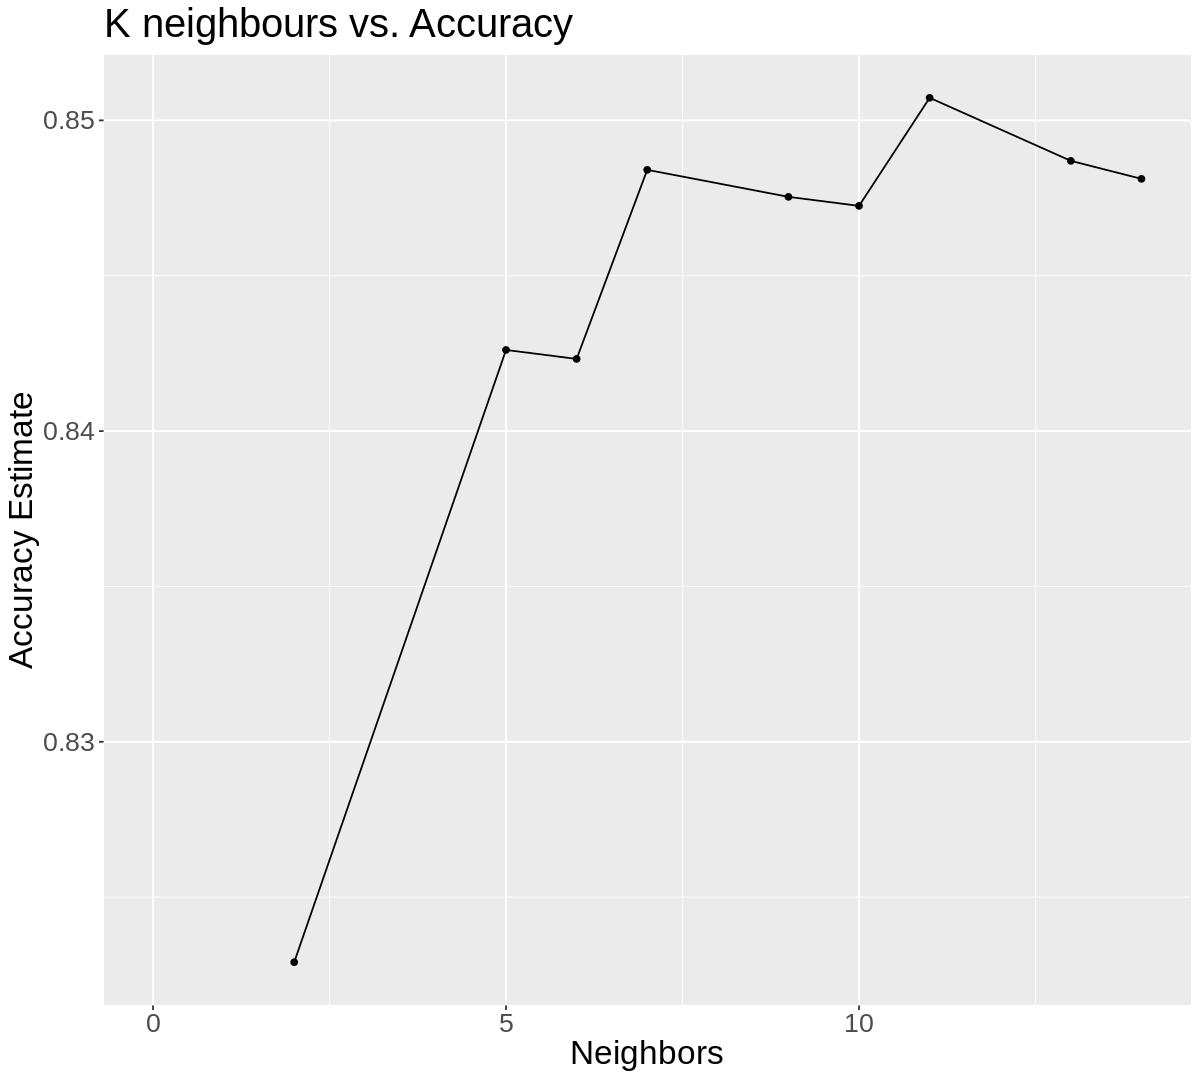

In [22]:
k_accuracy_plot

                          Figure 6.0.2 - K Accuracy Plot

We have selected K = 11 as the best number of neighbours to use in our classification model. From Figure 6.0.1, we see that K = 11 has the highest resulting accuracy. From Figure 6.0.2, nearby K values, such as K = 10 and K = 13, still have a relatively high accuracy, at around 0.846. Therefore, this indicates that the K = 11 will create a model that is relatively robust and stable, as the accuracy is still high for nearby K- values. 

### 7. Example of Result Visualization

After completing our model and testing it on the test dataset, we will create a confusion matrix to compare how observations were classified correctly and how many were incorrectly classified. This will give insight into the accuracy of our model as well as insight into what types of errors are being made. For example, a classification matrix will indicates whether our model is prone to false positives (non-spam email classified as spam) or false negatives (spam email classified as non-spam).  

## Expected Outcome

### 8. Expected Findings

We predict that emails with high frequencies of our predictor variables (ie. dollar signs, brackets, and exclamation marks) are indicative of the email being classified as spam. 


## Final Classification Model

After our initial data pre-processing and predictor selection process, we have selected 3 predictors to use for our classification model: `char_freq_exclamation`,  `char_freq_dollar`, `char_freq_bracket`. We will proceed by creating a classification with K = 11 using our training data, and later testing it with our allocated testing data.

### 9. Final Data Analysis 

#### 9.1 Building Our Model

We create a specification model to run our classification. We are using **K = 11**, which we previously found from through data analysis. This specification model is then put into a workflow using the recipe we previously created. 

In [46]:
#create a new model with k=11

spam_knn_best <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
                    set_engine("kknn") |>
                    set_mode("classification")

#Place the specification model into a workflow using our previously created recipe

spam_recipe <- recipe(spam_indicator ~ char_freq_exclamation + char_freq_dollar + char_freq_bracket, data= data_train) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors()) |>
            prep()

spam_fit_best <- workflow() |>
        add_recipe(spam_recipe) |>
        add_model(spam_knn_best) |>
        fit(data = data_train)

In [47]:
spam_fit_best

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1489855
Best kernel: rectangular
Best k: 11

#### 9.2 Predict Test Data

Now, we will introduce our testing dataset and predict using our model. 

In [48]:
spam_test_predictions <- predict(spam_fit_best , data_test) |>
      bind_cols(data_test)

In [49]:
spam_test_predictions

.pred_class,ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,⋯,char_freq_semicolon,char_freq_bracket,char_freq_squarebracket,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_indicator
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,8,0,0.00,0.00,0,1.88,0.00,0.00,1.88,⋯,0,0.206,0,0.000,0.000,0,2.450,11,49,1
1,15,0,0.00,1.42,0,0.71,0.35,0.00,0.35,⋯,0,0.102,0,0.357,0.000,0,1.971,24,205,1
1,16,0,0.42,0.42,0,1.27,0.00,0.42,0.00,⋯,0,0.063,0,0.572,0.063,0,5.659,55,249,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,4592,0,0,0,0,0,0,0,0,⋯,0,0.00,0,0.000,0,0,1.000,1,8,0
1,4594,0,0,0,0,0,0,0,0,⋯,0,0.00,0,1.052,0,0,1.000,1,6,0
0,4595,0,0,0,0,0,0,0,0,⋯,0,0.63,0,0.000,0,0,1.727,5,19,0


                                Figure 9.2 - Consolidated Dataset with Predictions

#### 9.3 Model Accuracy 

Now, we will view the accuracy of our predictions. We will use the`metrics` function to get statistics about the model quality. 

In [50]:
spam_prediction_accuracy <- spam_test_predictions |>
         metrics(truth = spam_indicator, estimate = .pred_class)          

In [51]:
spam_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8436142
kap,binary,0.6672716


                                    Figure 9.3 - Model Accuracy

### 10. Data Visualization

#### 10.1 K-Neighbours Vs. Accuracy

Provided below is Figure 10.1 (which was also included above in Section 6). This K vs Accuracy plot outlines the accuracy estimate of each K value, with the range of K values between 2-11. From Figure 6.0.2, K = 11 has the highest accuracy. Nearby K values, such as K = 10 and K = 13, also have a relatively high accuracy, indicating that using a K=11 will create a model that is relatively stable.

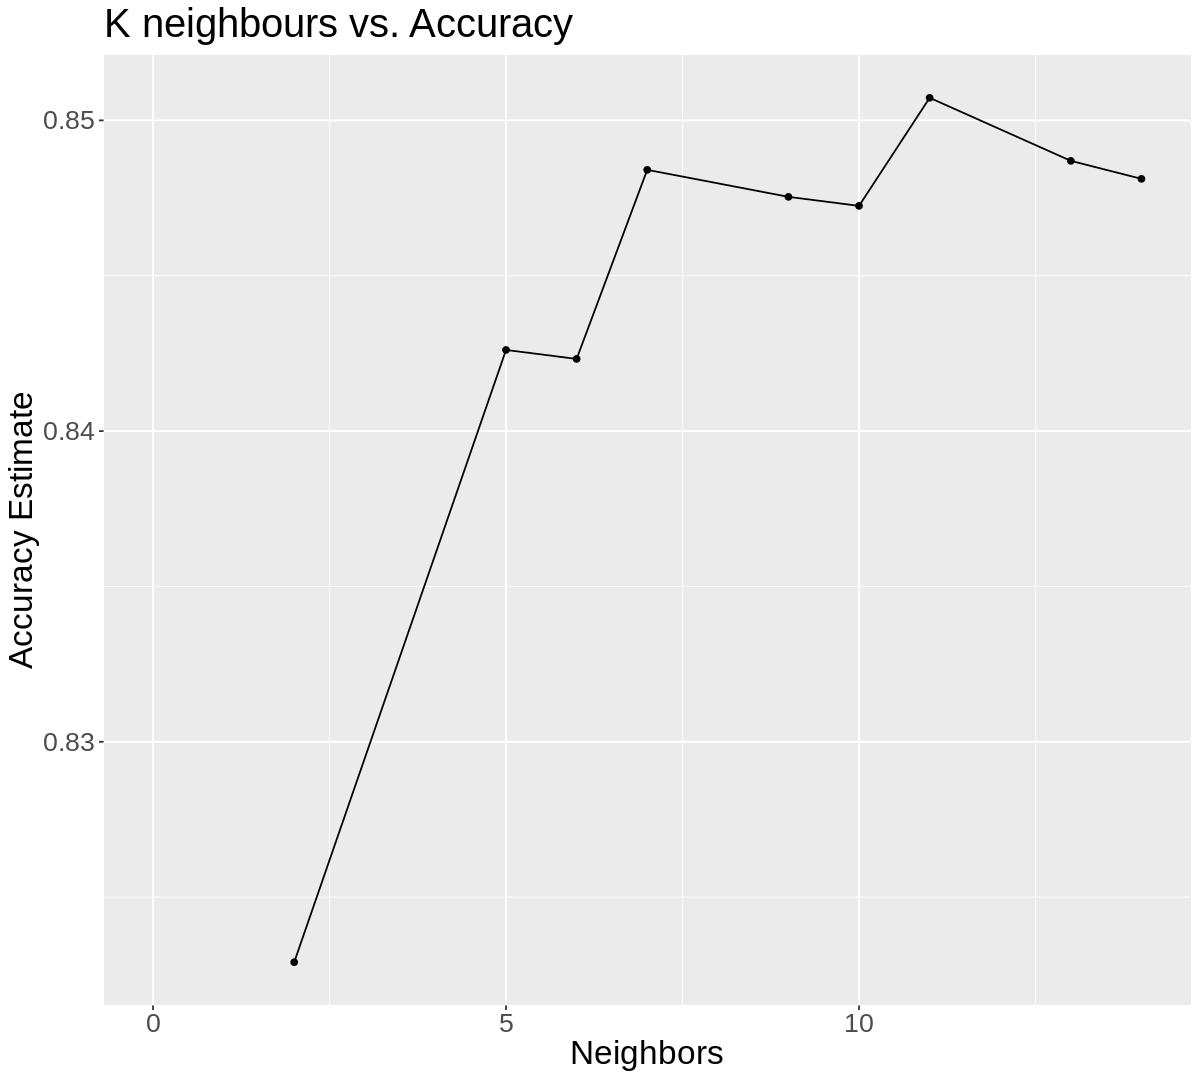

In [52]:
k_accuracy_plot

                            Figure 10.1 - K Versus Accuracy
             

#### 10.2 Confusion Matrix

We will also use a confusion matrix which is a performance measurement tool for classification models. Please refer to Figure 10.2.

In [53]:
spam_mat <- spam_test_predictions |> 
 conf_mat(truth = spam_indicator, estimate = .pred_class)

In [54]:
spam_mat

          Truth
Prediction   0   1
         0 628 111
         1  69 343

                                       Figure 10.2.0 - Model Confusion Matrix

To re-iterate, 1 indicates spam and 0 indicates non-spam emails. Therefore, to interpret out confusion matrix, the upper right quadrant represents observations that are **false-positives** (emails that are spam but were classified as non-spam). Similarly, the bottom-left quadrant represents observations that are **false-negatives** (emails that are not spam but were classified as spam). This showed that 628 non-spam emails and 343 spam emails were correctly classified while 69 non-spam emails and 111 spam emails were incorrectly classified. See below for a percentage calculation for each quadrant of the confusion matrix.

In [55]:
#Calculate percentage of false positive, false negative, true positive, true negative
total_observations <- 628 + 111 + 69 + 343
correct_pos_percent <- 628/ total_observations * 100
correct_neg_percent <- 343/total_observations * 100
false_pos_percent_total <- 69/total_observations * 100
false_neg_percent_total <- 111/total_observations * 100
false_pos_percent_relative <- 69/(111+343) * 100
false_neg_percent_relative <- 111/(111+343) * 100
total_errors_percent <- (111+69)/(628+111+69+343)*100

#Create a table to visualize the results above

conf_mat_results <- data.frame(correct_pos_percent = c(correct_pos_percent),
                 correct_neg_percent = c(correct_neg_percent),
                   false_pos_percent_total = c(false_pos_percent_total),
                    false_neg_percent_total  = c(false_neg_percent_total),
                    false_pos_percent_relative = c(false_pos_percent_relative),
                 false_neg_percent_relative = c(false_neg_percent_relative),
                     total_errors = c(total_errors_percent))

In [56]:
conf_mat_results

correct_pos_percent,correct_neg_percent,false_pos_percent_total,false_neg_percent_total,false_pos_percent_relative,false_neg_percent_relative,total_errors
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.56125,29.80017,5.994787,9.643788,15.19824,24.44934,15.63858


                                        Figure 10.2.1 - Confusion Matrix Results

Figure 10.2.1 breaks down the confusion matrix and how it should be interpreted. `false_pos_percent_total` and `false_neg_percent_total` indicate the percentage of misclassified predictions as a percentage of the entire dataset while `false_pos_percent_relative` and `false_neg_percent_relative` indicate the percentage of misclassified predictions as a percent of it's respective classification type (ie. out of all predictions classified negative or positive). 

According to our to this table, **our model has higher percentage of false negative** than false positive overall.

### 10.3 Predictor Frequency Vs. Observation Classification

To evaluate whether our original hypothesis is correct, we calculated the mean of the frequency of our predictor variables within each email and compared the mean frequencies with respect to their predicted class label. Based on our hypothesis, observations classified as non-spam should have a low average frequency of exclamation marks, dollar signs, and brackets. Similarly, observations classified as spam should have a higher average frequency of exclamation marks, dollar signs, and brackets.

In [57]:
spam_test_predictions_condensed <- spam_test_predictions |>
 select(.pred_class, ID, char_freq_exclamation, char_freq_dollar, char_freq_bracket, spam_indicator) |>
  group_by(.pred_class) |>
  summarize(mean_char_freq_exclamation = mean(char_freq_exclamation),
            mean_char_freq_dollar = mean(char_freq_dollar),
            mean_char_freq_bracket = mean(char_freq_bracket))

In [58]:
spam_test_predictions_condensed

.pred_class,mean_char_freq_exclamation,mean_char_freq_dollar,mean_char_freq_bracket
<fct>,<dbl>,<dbl>,<dbl>
0,0.05883085,0.00473207,0.1566401
1,0.59664320,0.21880583,0.1020510


                     10.3 - Mean Frequency of Predictors for Predicted Class

From Figure 10.3, we can see that observations that are classified as non-spam have low frequencies of exclamation marks and dollar signs. Observations classified as spam then have signficiantly higher frequencies of exclamation marks and dollar signs. However, both observations classified as non-spam or spam have similar frequencies of bracket signs.

## Discussion

### 11. Results

#### 11.1 Model Results

Using the K-NN classification model, we create a classification on the spam email databse provided by the UCI Machine Learning Respository. After conducting preliminary data analysis to select the model predictors of `char_freq_exclamation`,  `char_freq_dollar`, and `char_freq_bracket`and K-value of 11, a K-NN final classification model was created where the testing set was used to measure the model accuracy. 



Additionally, our hypothesis was only partially supported. Observations that were classified as non-spam had lower frequencies of exclamation marks and dollar signs, while observations classified as spam had higher frequencies of both. However, both spam and non-spam classified observations had similar frequencies of brackets. This indicates that exclamation marks are not indicative of whether an email will be classified as spam or not, based on our model.


#### 11.2 Performance Metrics Results

Overall, from Figure 9.3., the model has an accuracy of 84.36%, meaning that 84.36% of observations were correctly identified as their true class.

From Figure 9.2.1, the confusion matrix further breaksdown how many errors were made and the nature of the error (ie. false negative or false positive). Our classification model predicted 15.2% of non-spam observations as spam, which makes up 5.99% of total observations. Contrarily, our classification model predicted 24.45% of spam observations as non-spam, which makes up 9.64% of the total observations. The fact that our confusion matrix indicated a larger amount of false positives rather than false negatives is, in a way, favorable as false negatives have a greater consequence than false positives (Santos, 2020) due to the fact that classifying important emails as spam has graver consequences compared to spam mail slipping through occasionally.

### 12. Limitations


#### 12.1 Dataset Limitations

To reiterate, the dataset we used for our model is the Spambase Dataset which was created by Hopkins (1999). Personal emails were used to curate the non-spam portion of emails, hence personalized terms such as "george" or "650" were great indicators of non-spam. 

When a model was created with all predictors, the datast had a classification error of 7%. Our model produced an error percentage of 15.6%. However, we deliberately selected predictors that were non-personalized, such as punctuation,as we wanted a non-personalized spam model. Hence, our model results may be linked to the dataset itself and the nature of the emails themselves.

#### 12.2 Model Limitations

Possible limitations of our model stem from class imbalances in our dataset. According to numerous studies, unbalanced datasets are part and parcel of many practical applications (Japkowicz, 2000). An unbalanced dataset refers to a dataset where the class that is targeted has an uneven distribution of data observations. Our dataset was originally imbalanced with a distribution of 39.4% spam and 60.6% non-spam. This is particularly problematic for the KNN model as it is extremely sensitive to class imbalances. When modeling such data, the accuracy of the KNN model may be severely degraded due to the inclusion of such noisy features (Zhang & Mani, 2003). Past usage of our dataset has a consistent rate of false positives of 20-25%, with 7% misclassification overall. To counteract such limitations, one could adapt the model to undersample observations or could use models better suited to such datasets such as neural networks (ex. Banday et al. (2009) who found that KNN filter often produces the highest false positive rate in comparison to other algorithms such as support vector machine and Naïve Bayes).

In addition to not working optimally with unbalanced datasets, the KNN model is computationally intensive and slow during the prediction stage for larger datasets. Seeing as KNN’s accuracy is in direct correlation to the size of the dataset, this induces an indirect limitation on the accuracy of the model (Timbers et al., 2022).

### 13. Impact and Future Questions

#### 13.1 Finding Impacts

Our findings suggest that punctuation such as exclamation marks and dollar signs are possible predictors to classify emails as spam or not. With almost a hundred and fifty billion emails sent daily (Mohammed, 2020), the proliferation of unsolicited emails (ie. spam) poses a safety risk for millions of users. While spam may be relatively harmless, such as advertising spam, spam emails could be used for more harmful purposes, such as ransomware, increasing traffic to malicious websites, or phishing (Alurkar et al., 2017). 


Hence, our findings suggest that punctuation, specifically exclamation marks and dollar signs, could be a viable option for spam-detection algorithms or contribute to ongoing research looking for better spam-detection algorithms. However, bracket signs are not shown to be very good predictors for spam classifications. Overall, perhaps our findings can be intergrated into larger spam-classification research, such as including exclamation marks and dollar signs are predictor variables into larger, more complex models.

#### 13.2 Future Questions

Some future questions include: What other types of punctuations could be good predictors of spam? Can our model results and effectiveness of exclamation marks and dollar signs for spam classification be generalized onto a larger population (ie. would exclamation marks and dollar signs be good for other types of emails beyond our dataset?)

## References

- Ahmed, N., Amin, R., Aldabbas, H., Koundal, D., Alouffi, B., &amp; Shah, T. (2022, February 3). Machine learning techniques for spam detection in email and IOT Platforms: Analysis and Research Challenges. Security and Communication Networks. Retrieved November 26, 2022, from https://www.hindawi.com/journals/scn/2022/1862888/ 

- Banday, Tariq, M., & Jan, R. (2009). Effectiveness and limitations of statistical spam filters. Proceedings of the International Conference on New Trends in Statistics and Optimization, Srinagar, India, 2009, 40-65

- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

- Hopkins, M., Reeber, E., Forman, G., Suermondt, J., Hewlett-Packard Labs (1999). Spambase [Spambase Data Set]. UCI Machine Learning Repository Irvine, CA: University of California, School of Information and Computer Science.

- Japkowicz, N. (2000). Learning from Imbalanced Datasets: A comparison of various strategies. Proceedings of Learning from Imbalanced Datasets, AAAI Work-shop. Technical Report WS-00-05, 10-15.

- Mohammad, R.M.A. (2020), "A lifelong spam emails classification model", Applied Computing and Informatics, Vol. ahead-of-print No. ahead-of-print. https://doi.org/10.1016/j.aci.2020.01.002

- Santos, M. (2021, September 22). False positives vs. false negatives. Medium. Retrieved December 7, 2022, from https://towardsdatascience.com/false-positives-vs-false-negatives-4184c2ff941a

- Timbers, T., Campbell, T., & Lee, M. (2022). Data Science. CRC Press.

- Zhang, J.P. and Mani, I. (2003) KNN Approach to Unbalanced Data Distributions: A Case Study Involving Information Extraction. Proceeding of International Conference on Machine Learning (ICML 2003), Workshop on Learning from Imbalanced Data Sets, Washington DC.